##### Income inequality in relation to GDP

1. Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?
    * Be aware of the difference between correlation and causation here. A might cause B. B might cause A. But both A and B could be caused by an unknown C as well.


One way to express income inequality is to look at a country's "Gini coefficient" (also known as "Gini index"). You can find a dataset of Gini Coefficients here.


You can find a dataset with historical GDP data here.


To be able to answer this question you would want to calculate the "correlation coefficient" of the GDP and the Gini coefficient. But before you can do that you may need to resample the data so a correlation coefficient can be calculated.


If you want to learn more about calculating correlations using pandas and other Python libraries view this short video.
https://www.youtube.com/watch?v=TRNaMGkdn-A

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
gini_coefficient = pd.read_csv("https://raw.githubusercontent.com/MandyP717/Data-analytics-with-python/main/Income%20inequality%20in%20relation%20to%20GDP/economic-inequality-gini-index.csv")
gdp_data = pd.read_csv("https://raw.githubusercontent.com/MandyP717/Data-analytics-with-python/main/Income%20inequality%20in%20relation%20to%20GDP/gdp-per-capita-maddison-2020.csv")

In [3]:
gini_coefficient.drop(columns=['Code'], inplace=True)
gdp_data.drop(columns=['Code', '417485-annotations'], inplace=True)

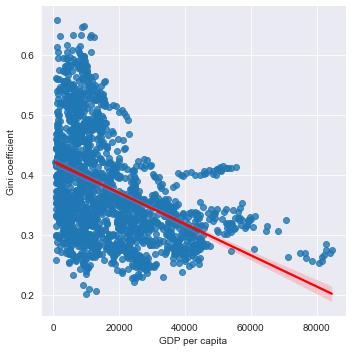

In [4]:
result_merge = pd.merge(gdp_data, gini_coefficient, how='outer', on=['Entity', 'Year'])
sns.set_style('darkgrid')
sns.lmplot(x='GDP per capita', y='Gini coefficient', data=result_merge, line_kws={'color': 'red'})

In [7]:
#dropping na because of pearson correlation
result_merge.dropna(inplace=True)
corr = result_merge.groupby('Entity')[['GDP per capita', 'Gini coefficient']].corr()
pearson_cor = result_merge.groupby('Entity')[['GDP per capita', 'Gini coefficient']].corr().iloc[0::2, -1]
display(pearson_cor.describe())
pearson_cor.median()

count    144.000000
mean      -0.132964
std        0.650216
min       -1.000000
25%       -0.751888
50%       -0.212539
75%        0.445343
max        1.000000
Name: Gini coefficient, dtype: float64

-0.21253863343884433

Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?
* Yes, there in general a negative correlation between a country's GDP and its income inequality. In other words, the higher the GDP of a country the lower the income inequality (Gini). 
However, there are several countries where the reverse is true such as Finland, USA and Taiwan.  